### Cho dữ liệu bill_authentication.csv
### Áp dụng thuật toán LLE để trực quan hóa dữ liệu với 2 (và 3 thành phần) thay vì 4 thành phần
### Sau khi giảm chiều (còn 2 hoặc 3 chiều) => áp dụng thuật toán ML cơ sở => kiểm tra kết quả => so sánh với khi chưa giảm chiều => quyết định có giảm chiều hay không???

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
bankdata = pd.read_csv("../../Data/bill_authentication.csv")

In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
# Class: có giá trị là 0 và 1
X = bankdata[["Variance", "Skewness","Curtosis","Entropy"]]
y = bankdata["Class"]

In [5]:
X.head(3)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [6]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [7]:
X = np.asarray(X)

### Trực quan hóa dữ liệu với LLE - 2 components

In [8]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)

In [9]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [10]:
X_reduced = lle.fit_transform(X)

In [11]:
X_reduced[:2]

array([[-0.0301151 , -0.01651947],
       [-0.02720132, -0.01973288]])

In [12]:
types = np.reshape(y.values, -1)

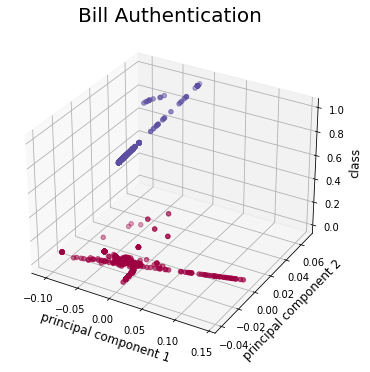

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], types,
c=types, cmap=plt.cm.Spectral)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_zlabel('class', fontsize=12)
ax.set_title('Bill Authentication', fontsize =20)
plt.show()

### Trực quan hóa dữ liệu với LLE - 3 components

In [14]:
lle1 = LocallyLinearEmbedding(n_components=3, n_neighbors=10)

In [15]:
X_reduced = lle1.fit_transform(X)

In [16]:
X_reduced[:2]

array([[-0.00103008, -0.03460008,  0.01656263],
       [-0.00246201, -0.03034167,  0.01977982]])

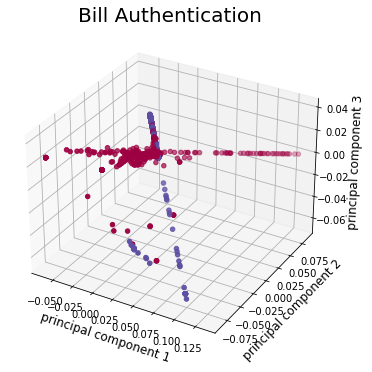

In [17]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=types, cmap=plt.cm.Spectral)
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_zlabel('principal component 3', fontsize=12)
ax.set_title('Bill Authentication', fontsize =20)
plt.show()